# Project Number -2 (Project Dynamics M20)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import scipy
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\arkay\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data=pd.read_csv('avacado.csv',parse_dates=['Date'])
data
# The table below represents weekly 2018 retail scan data for National retail volume (units) and price. 
# Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
# Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 
# The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
# The Product Lookup codes (PLU’s) in the table are only for Hass avocados.

# Date - The date of the observation
# AveragePrice - the average price of a single avocado
# type - conventional or organic
# year - the year
# Region - the city or region of the observation
# Total Volume - Total number of avocados sold
# 4046 - Total number of avocados with PLU 4046 sold
# 4225 - Total number of avocados with PLU 4225 sold
# 4770 - Total number of avocados with PLU 4770 sold
# AveragePrice- selling price per avacado(Target)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA

In [3]:
df=pd.DataFrame(data=data)
df.shape

(18249, 14)

In [4]:
df1=df.copy()
# taking a copy of the dataset. lets work on copied dataset.

In [5]:
df1.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df1.drop(['Unnamed: 0'],inplace=True,axis=1)
#this columns seems to have no relevance with the dataset. so lets drop this column

In [7]:
df1.shape

(18249, 13)

#EDA of Date column

In [8]:
data_dates=pd.DataFrame()
data_dates['month']=data['Date'].dt.month_name()
data_dates['year']=data['Date'].dt.year
data_dates['day']=data['Date'].dt.day_name()
data_dates['AveragePrice']=data['AveragePrice']
data_dates
# separating the date column into year-month-day column

,month,year,day,AveragePrice
0,December,2015,Sunday,1.33
1,December,2015,Sunday,1.35
2,December,2015,Sunday,0.93
3,December,2015,Sunday,1.08
4,November,2015,Sunday,1.28
...,...,...,...,...
18244,February,2018,Sunday,1.63
18245,January,2018,Sunday,1.71
18246,January,2018,Sunday,1.87
18247,January,2018,Sunday,1.93


In [9]:
data_dates['type_of_day']=np.where((data_dates['day']=='Sunday')|(data_dates['day']=='Saturday'),'weekend','weekday')
data_dates
# classifying weekdays and weekends in order to check the average price on each category

,month,year,day,AveragePrice,type_of_day
0,December,2015,Sunday,1.33,weekend
1,December,2015,Sunday,1.35,weekend
2,December,2015,Sunday,0.93,weekend
3,December,2015,Sunday,1.08,weekend
4,November,2015,Sunday,1.28,weekend
...,...,...,...,...,...
18244,February,2018,Sunday,1.63,weekend
18245,January,2018,Sunday,1.71,weekend
18246,January,2018,Sunday,1.87,weekend
18247,January,2018,Sunday,1.93,weekend


In [10]:
data_dates['type_of_day'].unique()
# we can see all the sales recorded are only on weekends

array(['weekend'], dtype=object)

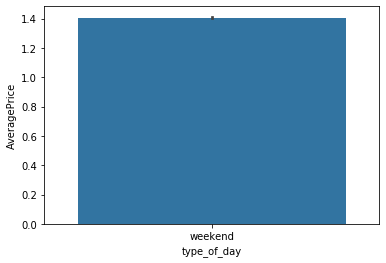

In [11]:
sns.barplot(x='type_of_day',y='AveragePrice',data=data_dates)
plt.show()

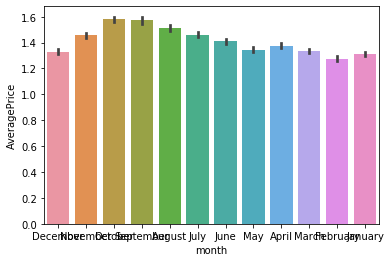

In [12]:
sns.barplot(x='month',y='AveragePrice',data=data_dates)
plt.show()
# checking the average price monthwise. we can prices are on higher side during September-October-November month
# we can prices are on lower side during Feb-March month

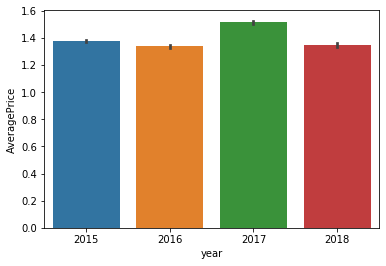

In [13]:
sns.barplot(x='year',y='AveragePrice',data=data_dates)
plt.show()
## checking the average price year-wise
# we can see prices went up in 2017, otherwise its quite stable in other years

In [14]:
data_dates=pd.DataFrame()
data_dates['month']=data['Date'].dt.month_name()
data_dates['year']=data['Date'].dt.year
data_dates['day']=data['Date'].dt.day_name()
data_dates['Total Volume']=data['Total Volume']
data_dates
# checking Total vloume in different dates

,month,year,day,Total Volume
0,December,2015,Sunday,64236.62
1,December,2015,Sunday,54876.98
2,December,2015,Sunday,118220.22
3,December,2015,Sunday,78992.15
4,November,2015,Sunday,51039.60
...,...,...,...,...
18244,February,2018,Sunday,17074.83
18245,January,2018,Sunday,13888.04
18246,January,2018,Sunday,13766.76
18247,January,2018,Sunday,16205.22


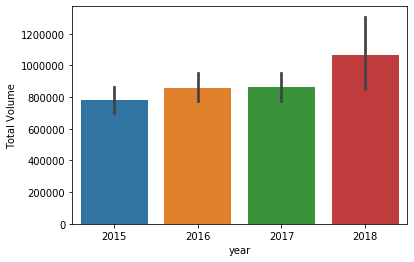

In [15]:
sns.barplot(x='year',y='Total Volume',data=data_dates)
plt.show()
# checking total volume on year-on-year basis and we can see the volume has gone up gradually

In [16]:
df1.info()
# no missing values (null) are present in the dataset
# datatype - two object, one datetime64, rest all numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


EDA on Region 

In [21]:
df1['region'].unique()
# checking different regions

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [23]:
le=LabelEncoder()

In [24]:
df1['region']=le.fit_transform(df1['region'])
# converting object datatype to numeriacl datatype

In [25]:
le.classes_

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [26]:
for i in df1['region'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))
# with the help of this we can identify each region realted to the number present in the dataset

0=['Albany']
1=['Atlanta']
2=['BaltimoreWashington']
3=['Boise']
4=['Boston']
5=['BuffaloRochester']
6=['California']
7=['Charlotte']
8=['Chicago']
9=['CincinnatiDayton']
10=['Columbus']
11=['DallasFtWorth']
12=['Denver']
13=['Detroit']
14=['GrandRapids']
15=['GreatLakes']
16=['HarrisburgScranton']
17=['HartfordSpringfield']
18=['Houston']
19=['Indianapolis']
20=['Jacksonville']
21=['LasVegas']
22=['LosAngeles']
23=['Louisville']
24=['MiamiFtLauderdale']
25=['Midsouth']
26=['Nashville']
27=['NewOrleansMobile']
28=['NewYork']
29=['Northeast']
30=['NorthernNewEngland']
31=['Orlando']
32=['Philadelphia']
33=['PhoenixTucson']
34=['Pittsburgh']
35=['Plains']
36=['Portland']
37=['RaleighGreensboro']
38=['RichmondNorfolk']
39=['Roanoke']
40=['Sacramento']
41=['SanDiego']
42=['SanFrancisco']
43=['Seattle']
44=['SouthCarolina']
45=['SouthCentral']
46=['Southeast']
47=['Spokane']
48=['StLouis']
49=['Syracuse']
50=['Tampa']
51=['TotalUS']
52=['West']
53=['WestTexNewMexico']


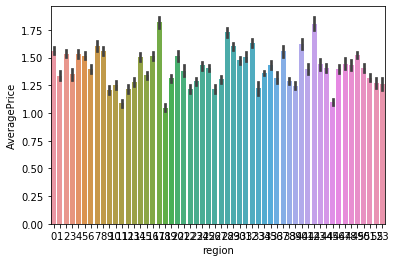

In [27]:
sns.barplot(x='region',y='AveragePrice',data=df1)
plt.show()
# checking average price region wise

In [28]:
df1['region'].value_counts()
#checking the entries for different region and we can see all the regions' data are uniformly incorporated in the dadaset

47    338
31    338
6     338
37    338
21    338
5     338
52    338
36    338
20    338
4     338
51    338
35    338
19    338
3     338
50    338
34    338
18    338
2     338
49    338
33    338
17    338
1     338
48    338
32    338
16    338
22    338
38    338
7     338
27    338
15    338
46    338
30    338
14    338
45    338
29    338
13    338
44    338
28    338
12    338
43    338
11    338
23    338
42    338
26    338
10    338
41    338
25    338
9     338
40    338
24    338
8     338
39    338
0     338
53    335
Name: region, dtype: int64

In [139]:
df1['year']=le.fit_transform(df1['year'])
# lets encode year with a number 

In [29]:
df1['type']=le.fit_transform(df1['type'])
#  converting object datatype to numeriacl datatype

In [30]:
le.classes_

array(['conventional', 'organic'], dtype=object)

In [31]:
for i in df1['type'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['conventional']
1=['organic']


In [32]:
df1.head()
# Now the dataset is completely numercial one

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


{'bodies': [<matplotlib.collections.PolyCollection at 0x2174b6a5388>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2174cb5a4c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x2174b6a5dc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x2174b6a5d48>}

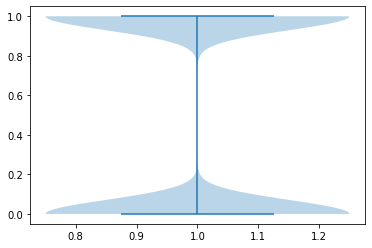

In [145]:
plt.violinplot(df1['type'])

EDA on average price

In [146]:
df1['AveragePrice'].mean()

1.4059784097758825

In [147]:
df1['AveragePrice'].min()

0.44

In [148]:
df1['AveragePrice'].max()

3.25

{'bodies': [<matplotlib.collections.PolyCollection at 0x2174b710288>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2174cb29248>,
 'cmins': <matplotlib.collections.LineCollection at 0x2174b710a08>,
 'cbars': <matplotlib.collections.LineCollection at 0x2174b7148c8>}

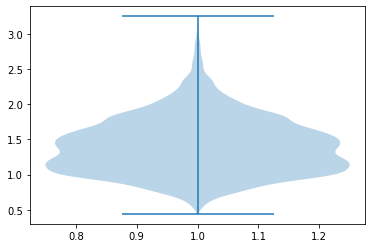

In [149]:
plt.violinplot(df1['AveragePrice'])
# we can see in most of the cases average price lies between 1 to 1.5$ 

In [152]:
df1.describe()
# data is very spread in total volume,total bags,small bags,xl bags,region
# outliers are present in avergae price,all PLU columns, xl bags 
# data seem to be skewed in various columns

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,1.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,0.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,1.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,3.000000,53.000000


In [153]:
df1.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

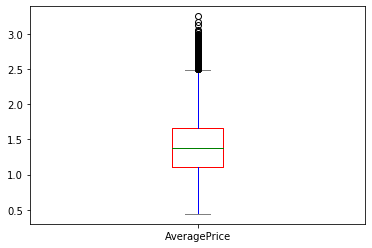

In [33]:
c={'boxes':'Red','whiskers':'Blue','medians':'Green','caps':'Grey'}
# fixing the color for boxplot
df1['AveragePrice'].plot.box(color=c)
# some outliers are present here. some sales were made at very high price

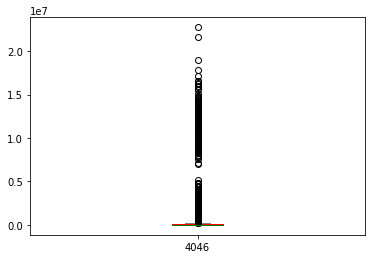

In [37]:
df1['4046'].plot.box(color=c)

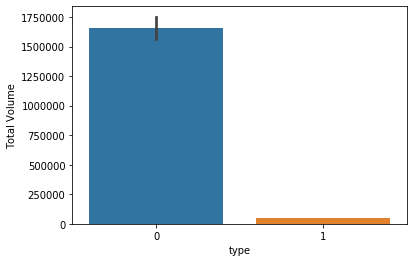

In [38]:
sns.barplot(x='type',y='Total Volume',data=df1)
# we can see the 'conventional' type of avacado is sold mostly in terms of volume

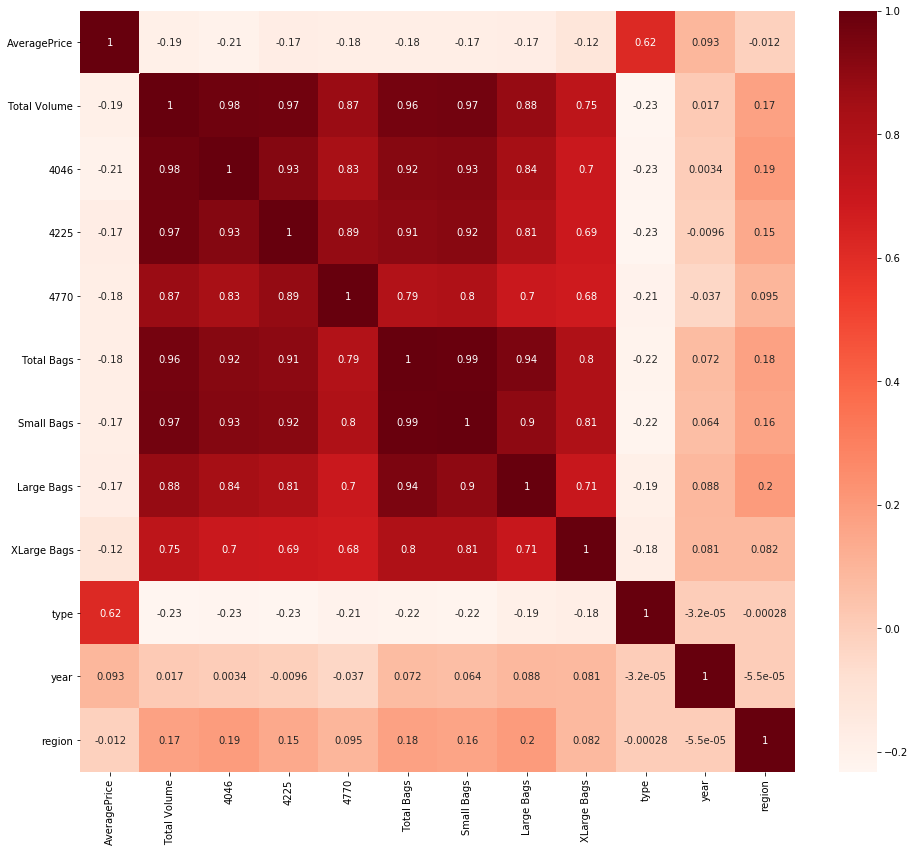

In [39]:
plt.figure(figsize=(16,14))
sns.heatmap(df1.corr(),cmap='Reds',annot=True)
# Checking co-relation between all the attributes.
# 'type','year' & 'region' are showing positive co relation with taget attribute(averageprice)


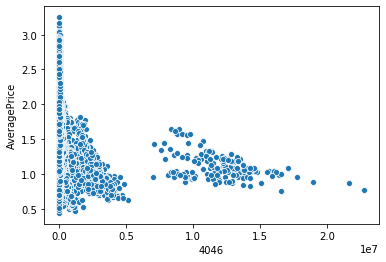

In [40]:
sns.scatterplot(data=df1,x='4046',y='AveragePrice')
# PLU 4046 is not positively corelated with average price

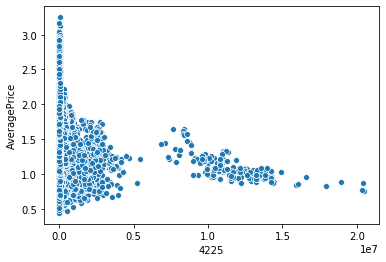

In [41]:
sns.scatterplot(data=df1,x='4225',y='AveragePrice')
# PLU 4225 is not positively corelated with average price

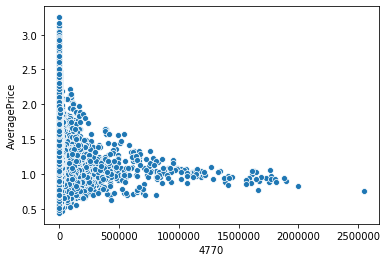

In [42]:
sns.scatterplot(data=df1,x='4770',y='AveragePrice')
# PLU 4770 is not positively corelated with average price

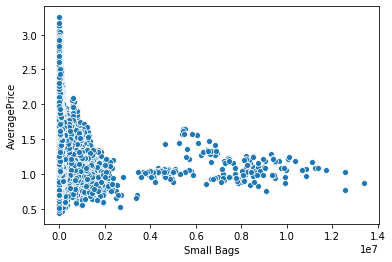

In [43]:
sns.scatterplot(data=df1,x='Small Bags',y='AveragePrice')
# 'small bags' is not positively corelated with average price

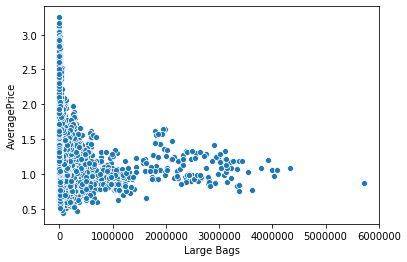

In [44]:
sns.scatterplot(data=df1,x='Large Bags',y='AveragePrice')
#  'large bags' is not positively corelated with average price

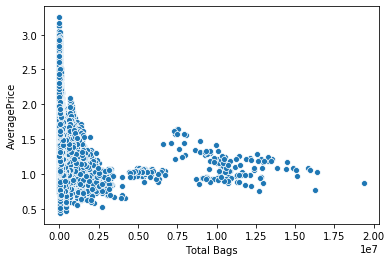

In [45]:
sns.scatterplot(data=df1,x='Total Bags',y='AveragePrice')
#  'xl bags' is not positively corelated with average price

In [46]:
# so we can observe column Date doesnt have any relevance with taget. so we can drop this column
# target (average price of each avacado) doesnt seem to have any impact with category of bags. so we can drop this column
df2=df1.drop(['Date','Small Bags','Large Bags','XLarge Bags','Total Bags'],axis=1)
df2.shape

(18249, 8)

 Cleaning the dataset to remove the outiers

In [48]:
z=np.abs(zscore(df2))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.00016441, 1.97050371,
        1.70081131],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [49]:
print(np.where(z>3))

(array([  346,   359,   783,   787,   788,   790,   791,   792,   794,
         795,   796,   797,   799,   803,   805,   807,   808,   809,
         812,   816,   820,   823,   827,  1334,  1347,  1516,  1518,
        1541,  2340,  2341,  2348,  2351,  2368,  2370,  2652,  2652,
        2652,  2652,  2653,  2653,  2653,  2653,  2654,  2654,  2654,
        2654,  2655,  2655,  2655,  2655,  2656,  2656,  2656,  2656,
        2657,  2657,  2657,  2657,  2658,  2658,  2658,  2658,  2659,
        2659,  2659,  2659,  2660,  2660,  2660,  2660,  2661,  2661,
        2661,  2661,  2662,  2662,  2662,  2662,  2663,  2663,  2663,
        2663,  2664,  2664,  2664,  2664,  2665,  2665,  2665,  2665,
        2666,  2666,  2666,  2666,  2667,  2667,  2667,  2667,  2668,
        2668,  2668,  2668,  2669,  2669,  2669,  2669,  2670,  2670,
        2670,  2670,  2671,  2671,  2671,  2671,  2672,  2672,  2672,
        2672,  2673,  2673,  2673,  2673,  2674,  2674,  2674,  2674,
        2675,  2675

In [50]:
df2n=df2[(z<3).all(axis=1)]
df2n
# new dataset with reduced number of columns

,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,0,2015,0
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,1,2018,53


In [51]:
df2n.skew()
#chcking skewness 

AveragePrice    0.385429
Total Volume    3.661159
4046            4.422120
4225            4.104196
4770            4.759495
type           -0.016371
year            0.221195
region          0.012062
dtype: float64

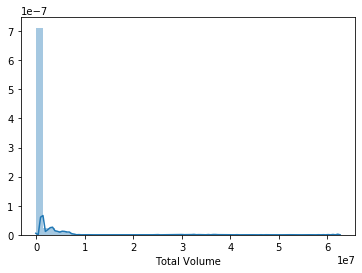

In [52]:
sns.distplot(df2['Total Volume'])

In [53]:
df2['Total Volume']=np.log(df2['Total Volume'])

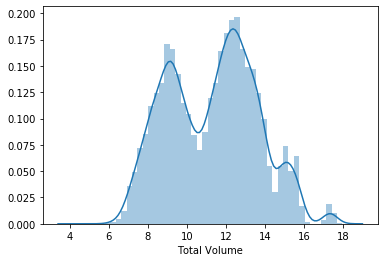

In [54]:
sns.distplot(df2['Total Volume'])

In [240]:
df2['4046']=np.log1p(df2['4046'])

In [280]:
df2['4225']=np.sqrt(df2['4225'])

In [281]:
df2['4770']=np.log(df2['4770'])

# Data pre processing and Model Training

In [55]:
x=df2n.iloc[:,1:]
x.head()

,Total Volume,4046,4225,4770,type,year,region
0,64236.62,1036.74,54454.85,48.16,0,2015,0
1,54876.98,674.28,44638.81,58.33,0,2015,0
2,118220.22,794.70,109149.67,130.50,0,2015,0
3,78992.15,1132.00,71976.41,72.58,0,2015,0
4,51039.60,941.48,43838.39,75.78,0,2015,0


In [56]:
scale=StandardScaler()

In [57]:
x=scale.fit_transform(x)

In [58]:
y=df2n.iloc[:,0]
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [59]:
# Optimising the seed value(random state)
# the output values are continous. so we have to comsider the regression algorithms here
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lm=LinearRegression(normalize=True)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    score=lm.score(x_train,y_train)
    print('maximum score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum score corresponding to random state',finalr,'is',maxr)

maximum score correspondng to random state 41 is: 0.40699803731195305
maximum score correspondng to random state 42 is: 0.41474460171776395
maximum score correspondng to random state 43 is: 0.40937730341442424
maximum score correspondng to random state 44 is: 0.4120423216078457
maximum score correspondng to random state 45 is: 0.41130547546984353
maximum score correspondng to random state 46 is: 0.4089394946253564
maximum score correspondng to random state 47 is: 0.40681208397298474
maximum score correspondng to random state 48 is: 0.4127929878440588
maximum score correspondng to random state 49 is: 0.4059777721283524
maximum score correspondng to random state 50 is: 0.4092281927412308
maximum score correspondng to random state 51 is: 0.40967153544792034
maximum score correspondng to random state 52 is: 0.41108085695428
maximum score correspondng to random state 53 is: 0.41085693049607575
maximum score correspondng to random state 54 is: 0.4156901146155101
maximum score correspondng to

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94,test_size=0.25)

In [61]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [62]:
print('score:',lm.score(x_train,y_train))
# we can see the score is not good enough 

score: 0.4176115635284796


In [64]:
# Lets check the regularization and optimose the score with the help of best hyper parameter
ls=Lasso()
alphavalue={'alpha':[1.0,0.1,0.01,0.001,0]}
grid=GridSearchCV(ls,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.030200975073187752
{'alpha': 0.001}


In [65]:
ls=Lasso(alpha=0)

In [66]:
ls.fit(x_train,y_train)

Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [67]:
ls.score(x_train,y_train)
# score is still not good enough. so model is still not learning well with these algorithms 

0.4176115635284796

In [69]:
rf=RandomForestRegressor(n_estimators=200,random_state=50)
# lets try to boost the score with the help of ensemble techniques

In [70]:
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9768671505445677


In [71]:
# So we can see Random Forestregressor is the best suitable option to train and predict the the outcome
# so we save this model 

# Saving the model 

In [72]:
joblib.dump(lm,'rfavacado.obj')

['rfavacado.obj']